# Random Forest
- *Author*: Jai Miles
- *Date*: 12/21/2020
- *Purpose*: This notebook uses a Decision Tree Regressor to predict student GPA
- *Data*: [Student Alcohol Consumption](https://www.kaggle.com/uciml/student-alcohol-consumption?select=student-por.csv)

*Data Citation*:

P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.

# Imports

Need to add venv to kernel
```python -m ipykernel install --user --name=<my_env_name>```
[Using venv with jupyter nb kernel](https://towardsdatascience.com/create-virtual-environment-using-virtualenv-and-add-it-to-jupyter-notebook-6e1bf4e03415)


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

import missingno as msno
import pywrangle as pw

# Load data

In [2]:
data_math_course = "data/student-mat.csv"
data_port_course = "data/student-por.csv"

df_math = pd.read_csv(data_math_course)
df_port = pd.read_csv(data_port_course)

In [3]:
df_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
df_port.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


### Merge data

In [5]:
course_dfs = (df_math, df_port)

In [6]:
df_students = pd.concat(course_dfs)
df_students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [7]:
pw.print_df_info(df_math, df_port, df_students)


Name       |   Cols   |      Rows   |      Size
--------   |   ----   |   -------   |   -------
0          |     33   |       395   |     13035
1          |     33   |       649   |     21417
2          |     33   |      1044   |     34452
Abs Diff   |      0   |       649   |     21417
% Diff     |    0.0   |   164.304   |   164.304

Compared indices -1 & 0


# Categorical vars

In [8]:
cat_cols = [c for c in df_students.columns if df_students[c].dtype == 'object']
cat_cols

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [9]:
df_students[cat_cols].head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no


In [10]:
def is_female(x: str) -> int:
    """Returns int if is female."""
    if x == 'f': return 1
    return 0

def has_internet(x: str) -> int:
    """Returns int if has internet"""
    if x == 'yes': return 1
    return 0

def seek_higher_ed(x: str) -> int:
    """Returns int if seeking higher ed"""
    if x == 'yes': return 1
    return 0

In [11]:
female_col, internet_int, higher_ed = 'female_int', 'internet_int', 'higher_int'

df_students[female_col] = df_students.sex.apply(is_female)
df_students[internet_int] = df_students.internet.apply(has_internet)
df_students[higher_ed] = df_students.higher.apply(seek_higher_ed)

In [12]:
transformed_cols = [female_col, internet_int, higher_ed]
df_students[transformed_cols].head()

,female_int,internet_int,higher_int
0,0,0,1
1,0,1,1
2,0,1,1
3,0,1,1
4,0,0,1


# Data for Modeling

In [13]:
y = df_students.G3

cat_features = [
    female_col,
    internet_int,
    higher_ed
]
num_features = [
    "G2",
    "G1",
    "Medu",
    "Fedu",
    "studytime",
    "absences",
    "traveltime",
    "Walc",
    "Dalc",
    "failures"
]
features = cat_features + num_features
print(features)
# features = ['female', 'seek_higher_ed']  # for visualization

['female_int', 'internet_int', 'higher_int', 'G2', 'G1', 'Medu', 'Fedu', 'studytime', 'absences', 'traveltime', 'Walc', 'Dalc', 'failures']


In [14]:
X = df_students[features]
X.head()

,female_int,internet_int,higher_int,G2,G1,Medu,Fedu,studytime,absences,traveltime,Walc,Dalc,failures
0,0,0,1,6,5,4,4,2,6,2,1,1,0
1,0,1,1,5,5,1,1,2,4,1,1,1,0
2,0,1,1,8,7,1,1,2,10,1,3,2,3
3,0,1,1,14,15,4,2,3,2,1,1,1,0
4,0,0,1,10,6,3,3,2,4,1,2,1,0


# Model

## Training & Testing data

In [15]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

## Random forest model

In [16]:
forest_model = RandomForestRegressor(random_state = 1)
forest_model.fit(train_X, train_y)

RandomForestRegressor(random_state=1)

## Predict

In [17]:
grade_predicts = forest_model.predict(val_X)
print(mean_absolute_error(val_y, grade_predicts))

0.8386685823754789


mean absolute error of 0.84! This is lower than the Decision Tree Regressor with 25 notes (0.8517)

## Visualize

NameError: name 'tree' is not defined

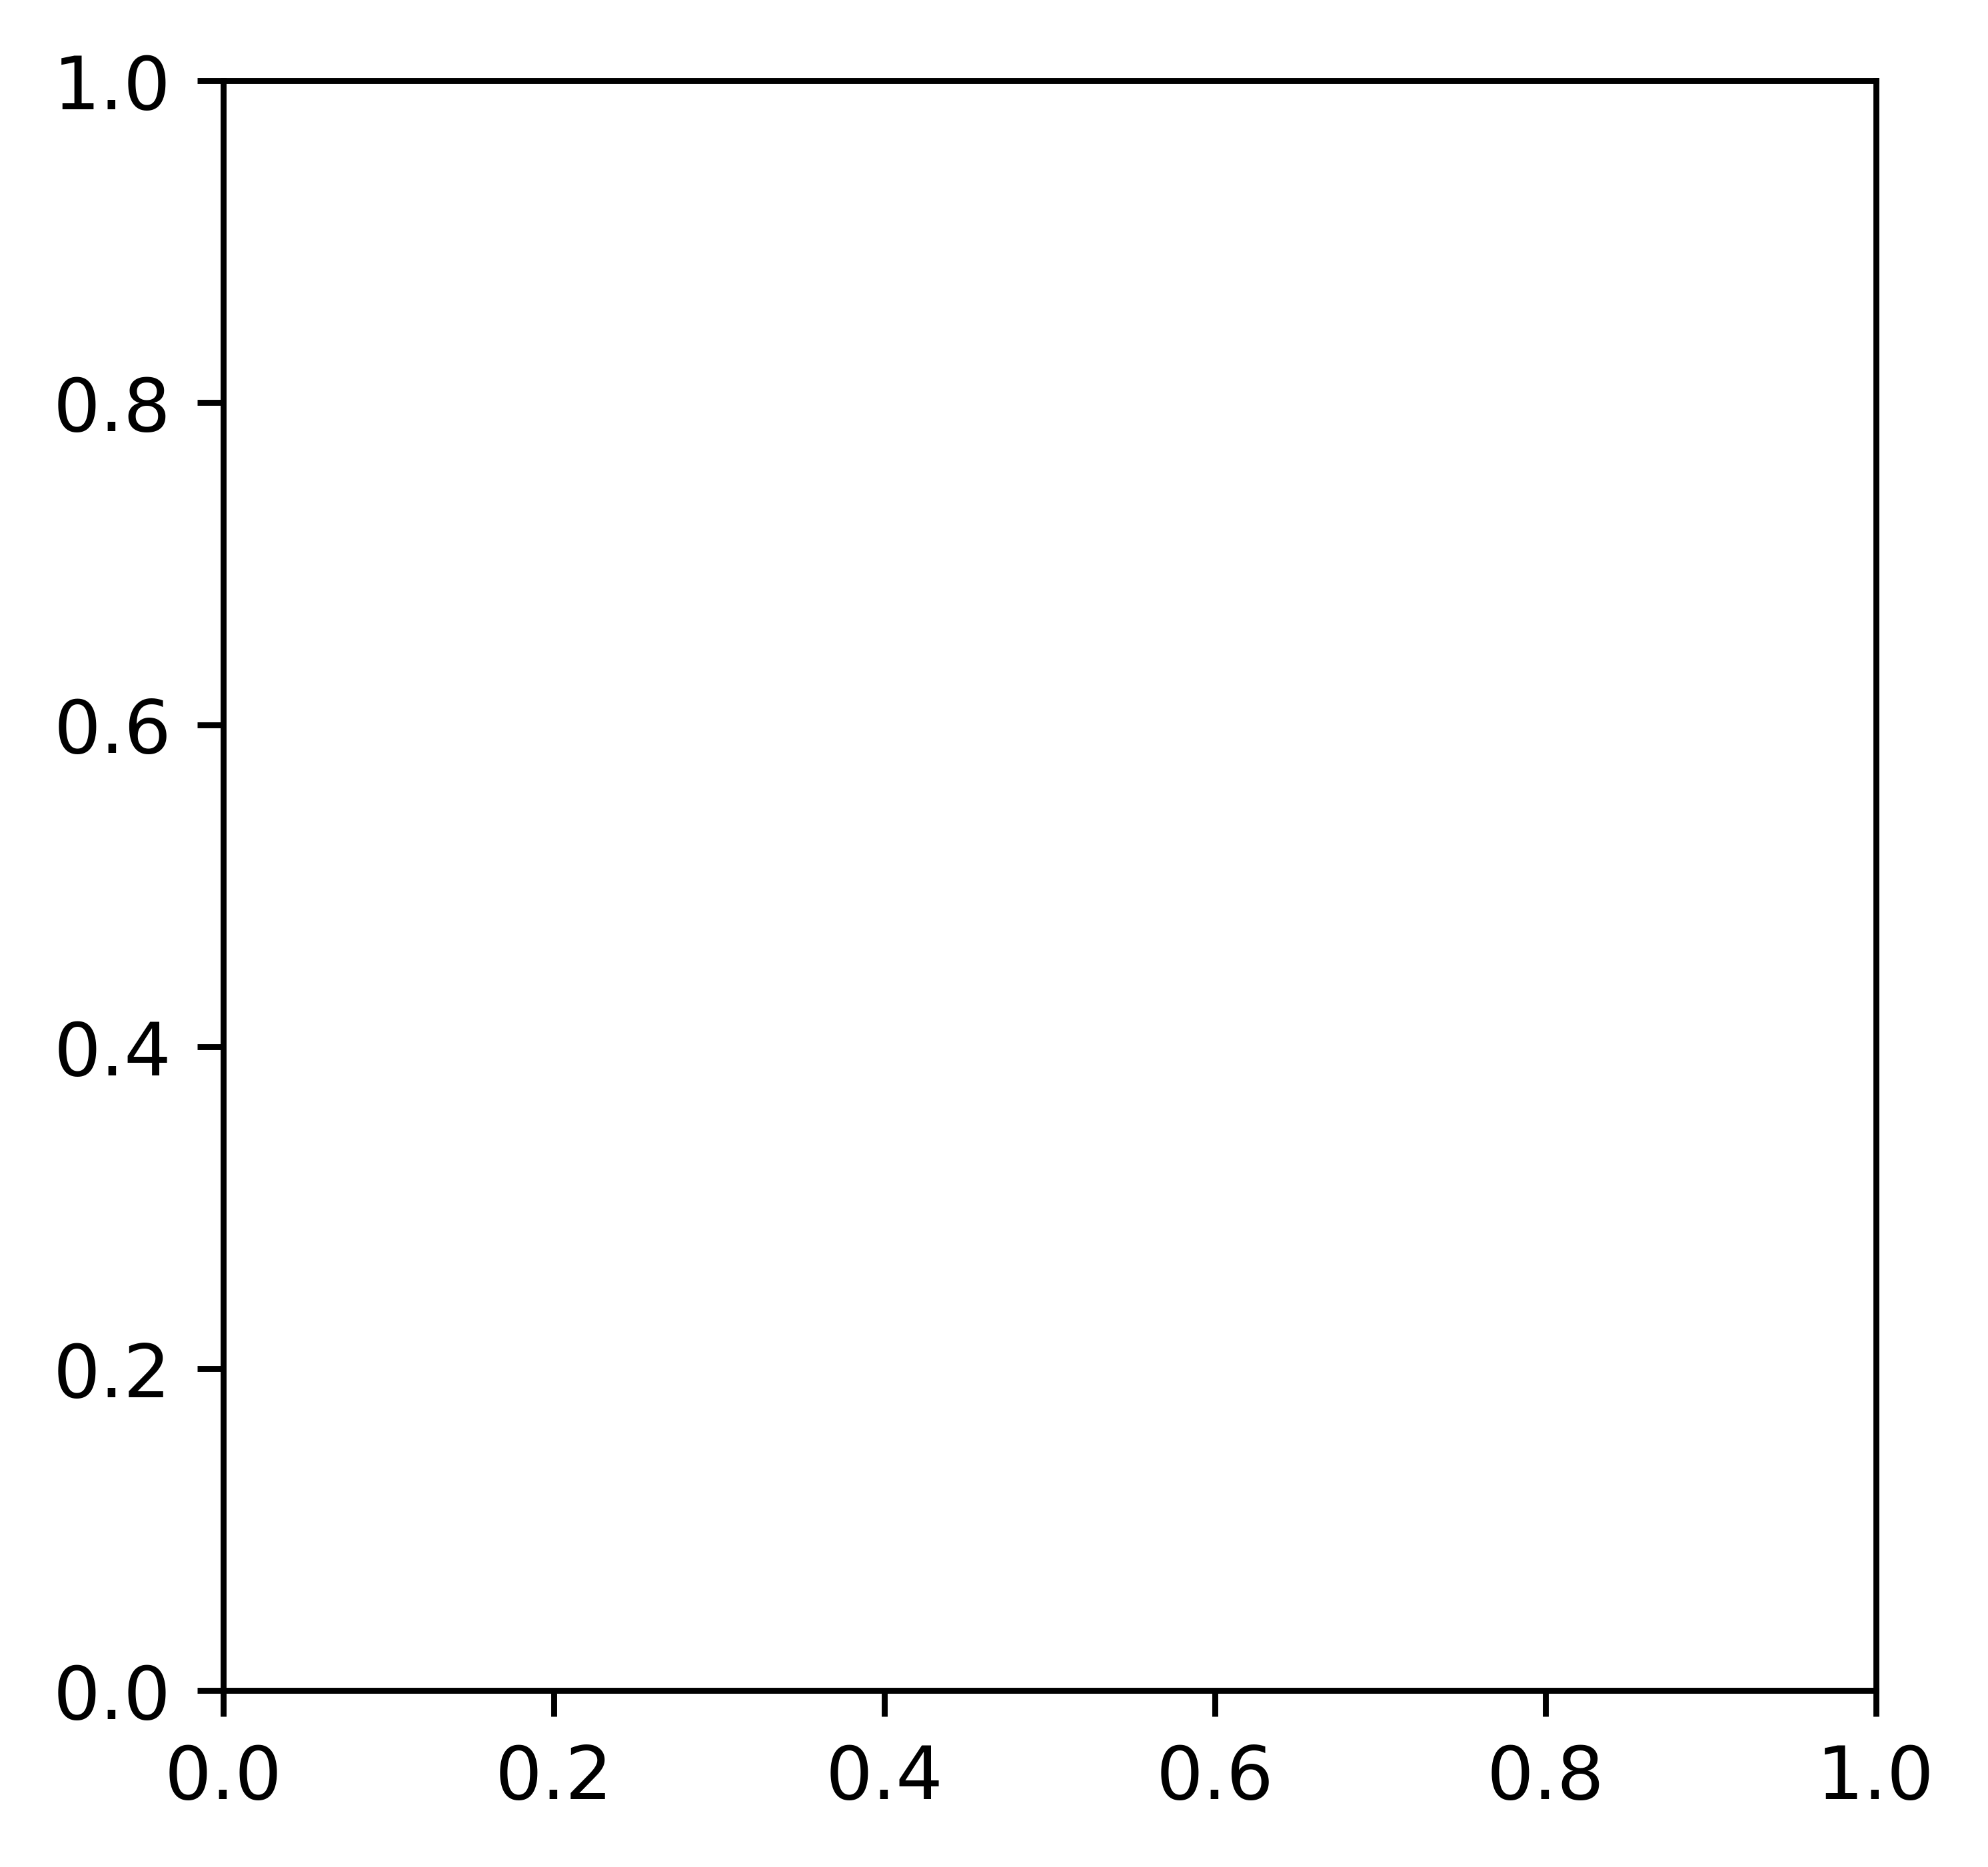

In [18]:
features_names = features
prediction_names = "g3"
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(forest_model.estimators_[0],
               feature_names = features_names, 
               class_names=prediction_names,
               filled = True);
fig.savefig('rf_individualtree.png')